In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
import datetime as datetime
%matplotlib inline

In [4]:
start = datetime.datetime(2015,4,1)
end=    datetime.datetime(2020,4,1)

In [5]:
TM= data.DataReader("TATAMOTORS.NS",'yahoo',start,end)
MM= data.DataReader("M&M.NS",'yahoo',start,end)
HM= data.DataReader("HEROMOTOCO.NS",'yahoo',start,end)


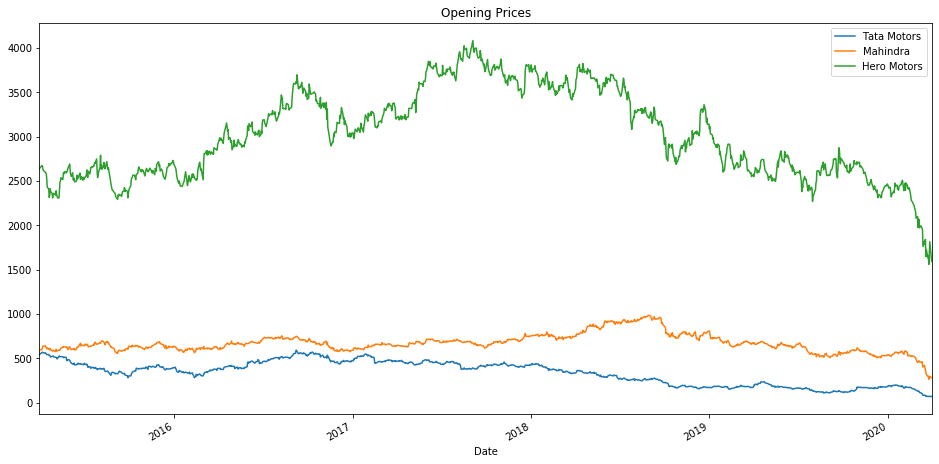

In [22]:
TM['Open'].plot(label='Tata Motors',figsize=(16,8),title='Opening Prices')
MM['Open'].plot(label='Mahindra')
HM['Open'].plot(label='Hero Motors')
plt.legend();

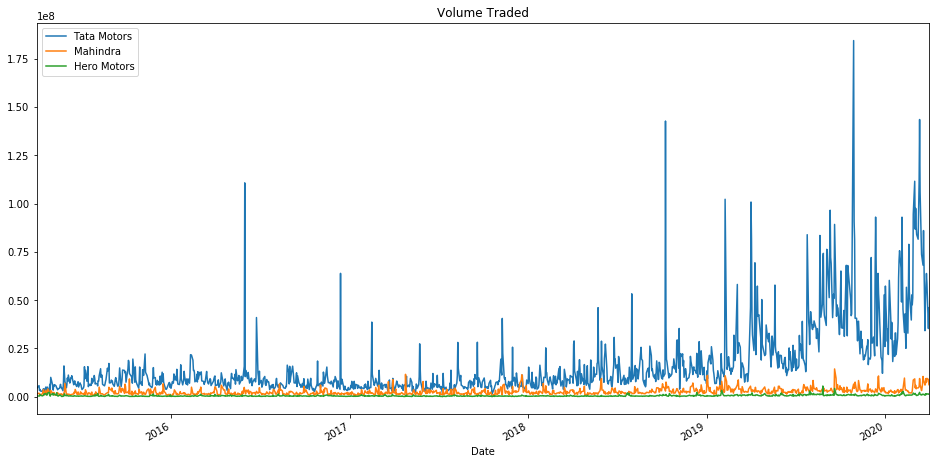

In [23]:
TM['Volume'].plot(label='Tata Motors',figsize=(16,8),title='Volume Traded')
MM['Volume'].plot(label='Mahindra')
HM['Volume'].plot(label='Hero Motors')
plt.legend();

In [26]:
TM['Volume'].idxmax()

# JLR imporved sales results this day

Timestamp('2019-10-29 00:00:00')

In [30]:
TM['Amount Traded']=(TM['Open']+TM['Close']/2)*TM['Volume']
MM['Amount Traded']=(MM['Open']+MM['Close']/2)*MM['Volume']
HM['Amount Traded']=(HM['Open']+HM['Close']/2)*HM['Volume']

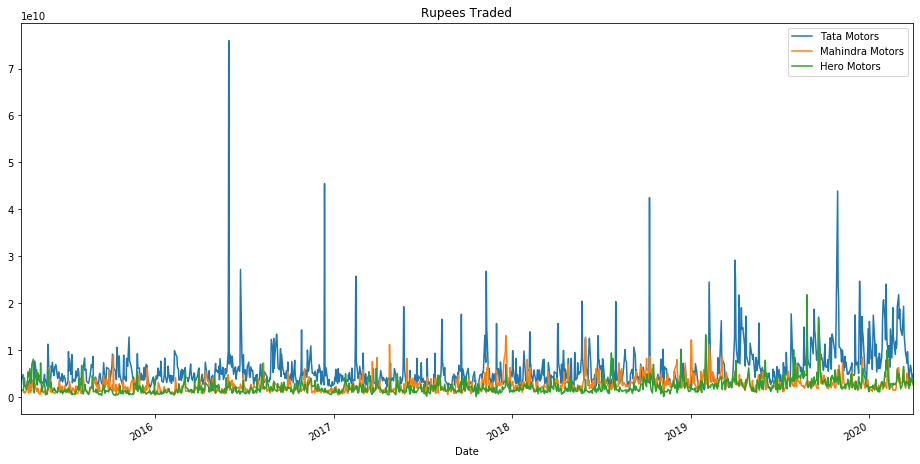

In [35]:
TM['Amount Traded'].plot(label="Tata Motors",figsize=(16,8),title='Rupees Traded')
MM['Amount Traded'].plot(label="Mahindra Motors")
HM['Amount Traded'].plot(label="Hero Motors")
plt.legend();

In [38]:
TM['Amount Traded'].idxmax()

# Posted a three fold rise in quaterly net profit

Timestamp('2016-05-31 00:00:00')

In [41]:
MM['50MA']=MM['Close'].rolling(50).mean()
MM['200MA']=MM['Close'].rolling(200).mean()


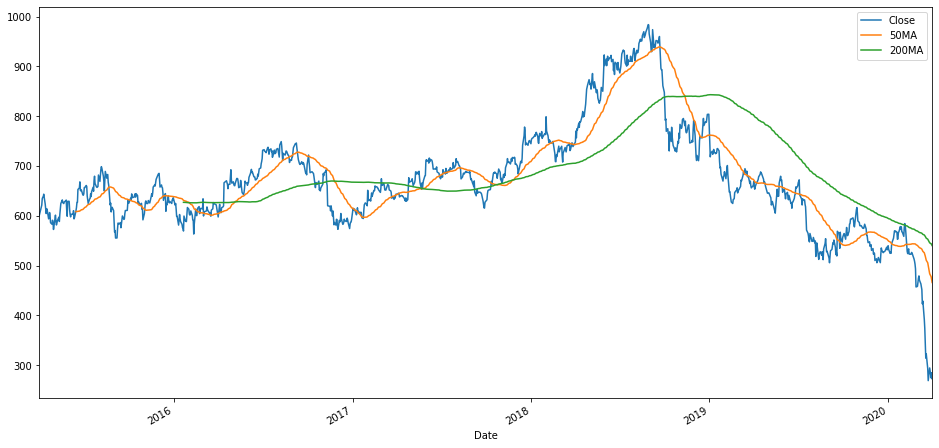

In [46]:
MM[['Close','50MA','200MA']].plot(figsize=(16,8))

In [49]:
motor_comp=pd.concat([TM["Close"],MM["Close"],HM["Close"]],axis=1)

In [52]:
motor_comp.columns=['Tata','Mahindra','Hero']

In [53]:
motor_comp

,Tata,Mahindra,Hero
Date,,,
2015-04-01,558.905029,601.049988,2655.850098
2015-04-06,568.150024,621.325012,2672.699951
2015-04-07,560.349976,634.424988,2632.350098
2015-04-08,561.500000,637.099976,2605.800049
2015-04-09,559.900024,637.275024,2611.600098
...,...,...,...
2020-03-26,70.800003,285.500000,1801.900024
2020-03-27,70.699997,294.500000,1661.199951
2020-03-30,68.150002,274.399994,1553.500000


In [54]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120008e90>,
      dtype=object)

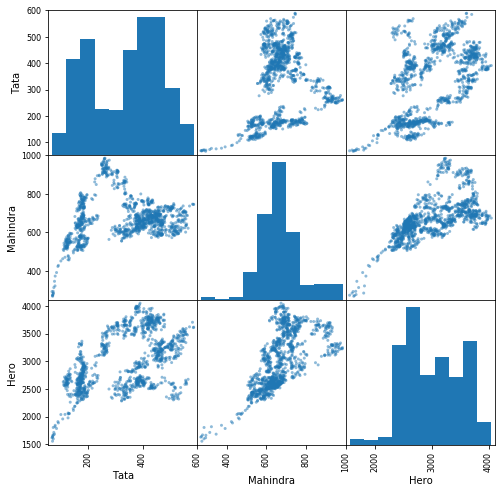

In [55]:
scatter_matrix(motor_comp,figsize=(8,8))

In [56]:
 # Mahindra and Hero , Hero and Tata Have a moderate positive correlation

In [62]:
TM['Returns']= (TM['Close']/TM['Close'].shift(1))-1
MM['Returns']= (MM['Close']/MM['Close'].shift(1))-1
HM['Returns']= (HM['Close']/HM['Close'].shift(1))-1

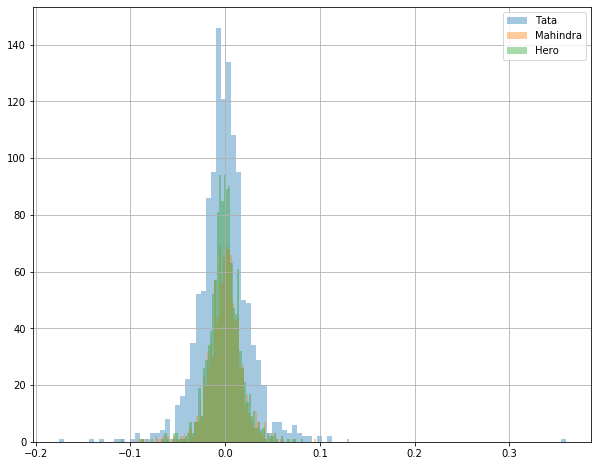

In [64]:
TM['Returns'].hist(bins=100,label='Tata',figsize=(10,8),alpha=0.4)
MM['Returns'].hist(bins=100,label='Mahindra',figsize=(10,8),alpha=0.4)
HM['Returns'].hist(bins=100,label='Hero',figsize=(10,8),alpha=0.4)
plt.legend()

In [65]:
# Tata is most volatile followed by Mahindra

In [71]:
box_col =pd.concat([TM['Returns'],MM['Returns'],HM['Returns']],axis=1)
box_col.columns=['Tata','Mahindra','Hero']

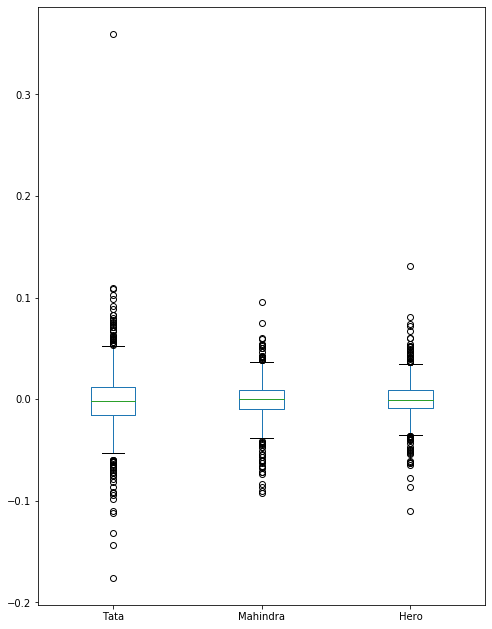

In [76]:
box_col.plot(kind='box',figsize=(8,11))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1272b9590>,
      dtype=object)

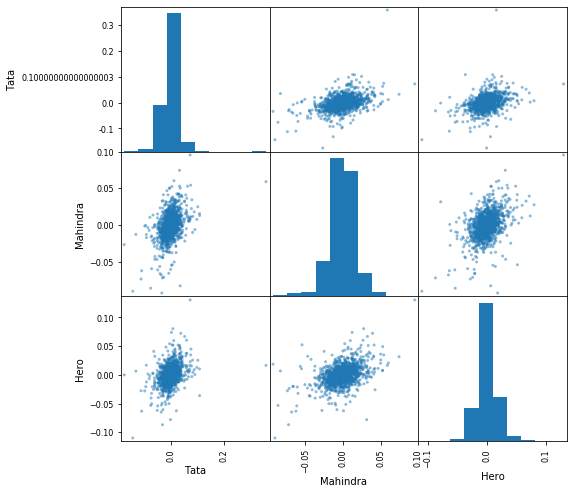

In [78]:
scatter_matrix(box_col,figsize=(8,8))

In [80]:
TM['Cum ret']= (1+TM['Returns']).cumprod()
MM['Cum ret']= (1+MM['Returns']).cumprod()
HM['Cum ret']= (1+HM['Returns']).cumprod()

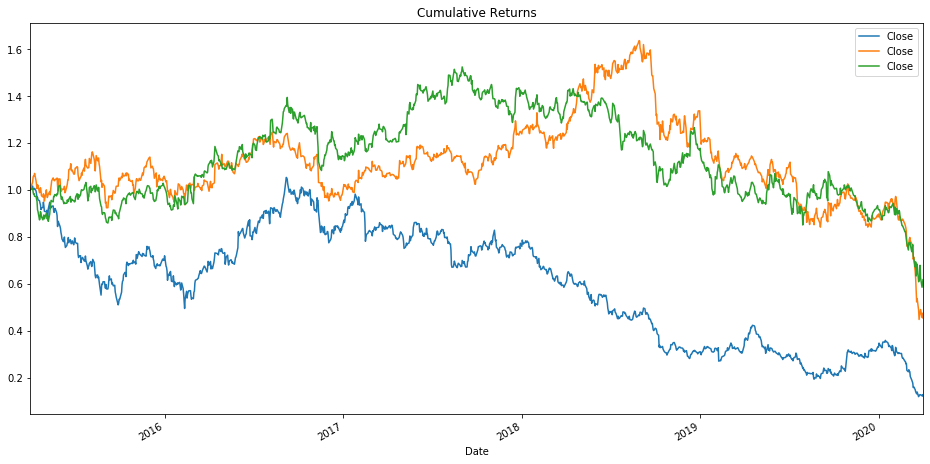

In [14]:
#cumulative return 
(TM['Close']/TM['Close'].iloc[0]).plot(figsize=(16,8),title='Cumulative Returns')
(MM['Close']/MM['Close'].iloc[0]).plot(figsize=(16,8))
(HM['Close']/HM['Close'].iloc[0]).plot(figsize=(16,8))
plt.legend();